In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score
import keras

In [13]:
data = pd.read_csv('/content/CCPP_data.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
data = np.array(data)
X = data[:,0:4]
y = data[:,4].reshape(-1,1)

In [15]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [16]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)

X_test_scaled = X_scaler.fit_transform(X_test)
y_test_scaled = y_scaler.fit_transform(y_test)

In [17]:
# Feed-forward Neural Network model

def FFNN_model(hidden_layers, layer_size, regularizationValue, learningRate):
#layer_size is a list which contains same number of elements as number of hidden layers
    model = Sequential()
    model.add(Dense(layer_size[0], 
                    kernel_regularizer=regularizers.L1(regularizationValue), 
                    activation='relu', 
                    kernel_initializer='he_normal', 
                    input_shape=(4,)))
    
    for i in range(1,hidden_layers):
        model.add(Dense(layer_size[i], 
                        kernel_regularizer=regularizers.L1(regularizationValue), 
                        activation='relu', 
                        kernel_initializer='he_normal'))
        
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learningRate))
    return model

In [18]:
best_model = FFNN_model(2,[10,20],0.001,0.05)
best_model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=50)    #final model training with all the data points

Epoch 1/30
154/154 [==============================] - 1s 2ms/step - loss: 0.1596
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 5/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0776
Epoch 6/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 7/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 8/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 9/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 10/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 11/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 12/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 13/30
154/154 [====

Text(0, 0.5, 'y_pred')

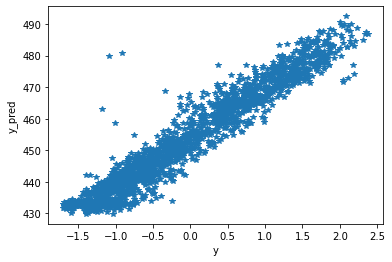

In [19]:
y_scaled_pred = best_model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_scaled_pred )

plt.figure()
plt.plot(y_test_scaled, y_pred, '*')
plt.xlabel('y')
plt.ylabel('y_pred')

In [20]:
best_model.save('sahil_model.h5')   # Always save model file with your name so that we can keep track on your files

In [21]:
# how to write the final code for submission

def sahil_model(data):
    data = np.array(data)
    X = data[:,0:4]
    y = data[:,4].reshape(-1,1)

    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X)

    y_scaler = StandardScaler()
    y_scaled = y_scaler.fit_transform(y)

    model = keras.models.load_model('/content/sahil_model.h5')
    y_scaled_pred = model.predict(X_scaled)
    y_pred = y_scaler.inverse_transform(y_scaled_pred )
    plt.figure()
    plt.plot(y, y_pred, '*')
    plt.xlabel('y')
    plt.ylabel('y_pred')
    r2 =  r2_score(y, y_pred)
    return r2

0.9366823693274

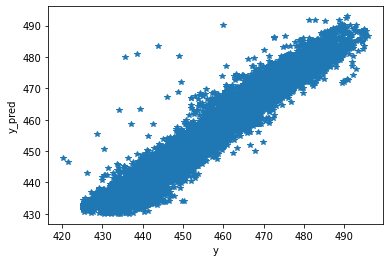

In [22]:
sahil_model(data)